In [95]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [96]:
# Loading and displaying the dataset
file_path = '/Users/kyla/Desktop/paml-lyb/ML-in-Real-Estate/data/New York, NY_sold_past365days.csv'
housing_data = pd.read_csv(file_path)
housing_data.head()
housing_data.info()
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           10000 non-null  object 
 1   style            10000 non-null  object 
 2   street           9979 non-null   object 
 3   city             10000 non-null  object 
 4   zip_code         9999 non-null   float64
 5   beds             8703 non-null   float64
 6   full_baths       8464 non-null   float64
 7   half_baths       2749 non-null   float64
 8   sqft             6904 non-null   float64
 9   year_built       8563 non-null   float64
 10  days_on_mls      6310 non-null   float64
 11  list_price       8875 non-null   float64
 12  sold_price       10000 non-null  int64  
 13  assessed_value   5975 non-null   float64
 14  estimated_value  6933 non-null   float64
 15  lot_sqft         5223 non-null   float64
 16  price_per_sqft   6904 non-null   float64
 17  latitude     

,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,sold_price,assessed_value,estimated_value,lot_sqft,price_per_sqft,latitude,longitude,stories
count,9999.000000,8703.000000,8464.000000,2749.000000,6904.000000,8563.000000,6310.000000,8.875000e+03,1.000000e+04,5.975000e+03,6.933000e+03,5.223000e+03,6904.000000,9324.000000,9324.000000,7205.000000
mean,10801.272027,2.905550,1.749646,1.086213,1780.949160,1957.922691,170.256260,1.104134e+06,1.096758e+06,1.087258e+05,1.023309e+06,7.271305e+03,717.417005,40.682508,-73.962871,6.401249
std,563.003598,1.798272,1.006683,0.337259,5302.020161,34.218667,118.808031,4.693596e+06,5.870682e+06,1.421254e+06,1.169288e+06,5.440150e+04,3338.021665,0.090531,0.131160,11.116396
min,10001.000000,0.000000,1.000000,1.000000,300.000000,1601.000000,0.000000,2.500000e+03,6.200000e+02,6.000000e+01,2.065800e+04,1.530000e+02,1.000000,40.498702,-77.874664,0.000000
25%,10305.000000,2.000000,1.000000,1.000000,975.000000,1930.000000,100.000000,4.999000e+05,4.800000e+05,3.612000e+04,6.070000e+05,2.000000e+03,375.000000,40.610983,-74.024077,2.000000
50%,11204.000000,3.000000,1.000000,1.000000,1381.500000,1955.000000,143.000000,7.500000e+05,7.399995e+05,4.842000e+04,8.019280e+05,2.640000e+03,495.000000,40.686435,-73.958288,2.000000
75%,11356.000000,4.000000,2.000000,1.000000,2054.250000,1985.000000,208.000000,1.150000e+06,1.115000e+06,7.113000e+04,1.127741e+06,4.000000e+03,746.000000,40.757561,-73.876367,4.000000
max,14481.000000,22.000000,13.000000,10.000000,260000.000000,2024.000000,1510.000000,3.995000e+08,5.650000e+08,1.040778e+08,3.808595e+07,2.744280e+06,274538.000000,43.004954,-73.701469,96.000000


In [97]:
# Handling missing data
missing_data = housing_data.isnull().sum()
missing_data_percentage = (missing_data / len(housing_data)) * 100
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
missing_data_summary.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
half_baths,7251,72.51
lot_sqft,4777,47.77
assessed_value,4025,40.25
days_on_mls,3690,36.90
price_per_sqft,3096,30.96
sqft,3096,30.96
estimated_value,3067,30.67
stories,2795,27.95
full_baths,1536,15.36
year_built,1437,14.37


In [98]:
# Data cleaning steps
housing_data['half_baths'].fillna(0, inplace=True)
housing_data.drop(columns=['days_on_mls', 'assessed_value', 'estimated_value', 'lot_sqft', 'stories'], inplace=True)
median_sqft = housing_data['sqft'].median()
housing_data['sqft'].fillna(median_sqft, inplace=True)
housing_data.loc[housing_data['price_per_sqft'].isnull(), 'price_per_sqft'] = housing_data['sold_price'] / housing_data['sqft']

median_values = {
    'full_baths': housing_data['full_baths'].median(),
    'beds': housing_data['beds'].median(),
    'year_built': housing_data['year_built'].median(),
    'list_price': housing_data['list_price'].median()
}
housing_data.fillna(median_values, inplace=True)

for zip_code in housing_data['zip_code'].unique():
    lat_median = housing_data.loc[housing_data['zip_code'] == zip_code, 'latitude'].median()
    long_median = housing_data.loc[housing_data['zip_code'] == zip_code, 'longitude'].median()
    housing_data.loc[(housing_data['zip_code'] == zip_code) & (housing_data['latitude'].isnull()), 'latitude'] = lat_median
    housing_data.loc[(housing_data['zip_code'] == zip_code) & (housing_data['longitude'].isnull()), 'longitude'] = long_median

/var/folders/84/407g7szd0h91zh0w0ftr4brh0000gn/T/ipykernel_86556/1481647926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['half_baths'].fillna(0, inplace=True)
/var/folders/84/407g7szd0h91zh0w0ftr4brh0000gn/T/ipykernel_86556/1481647926.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [99]:
# Further data cleaning via geographical data
housing_data['zip_code'].fillna(housing_data['zip_code'].mode()[0], inplace=True)
housing_data['county'].fillna(housing_data['county'].mode()[0], inplace=True)
housing_data.dropna(subset=['latitude', 'longitude'], inplace=True)

housing_data['zip_code'] = housing_data['zip_code'].astype(int)
housing_data = housing_data[(housing_data['latitude'].between(40.5, 41.5)) & (housing_data['longitude'].between(-74.5, -73.5))]

/var/folders/84/407g7szd0h91zh0w0ftr4brh0000gn/T/ipykernel_86556/3638977399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['zip_code'].fillna(housing_data['zip_code'].mode()[0], inplace=True)
/var/folders/84/407g7szd0h91zh0w0ftr4brh0000gn/T/ipykernel_86556/3638977399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [100]:
# Feature engineering
current_year = 2024
housing_data['house_age'] = current_year - housing_data['year_built']
encoder = OneHotEncoder(sparse_output=False, drop='first')
style_encoded = encoder.fit_transform(housing_data[['style']])
style_encoded_df = pd.DataFrame(style_encoded, columns=encoder.get_feature_names_out())
housing_data = pd.concat([housing_data.reset_index(drop=True), style_encoded_df], axis=1)

In [101]:
# Logarithmic transformation
def log_transform(feature):
    return np.log1p(feature)  # avoid log(0)

# Standardization
def standardize(feature):
    mean_val = feature.mean()
    std_val = feature.std()
    return (feature - mean_val) / std_val

# Normalization
def normalize(feature):
    min_val = feature.min()
    max_val = feature.max()
    return (feature - min_val) / (max_val - min_val)

# Applying transformations

log_features = ['sqft', 'list_price', 'sold_price']
for feature in log_features:
    housing_data[feature + '_log'] = log_transform(housing_data[feature])


standard_features = ['house_age', 'beds', 'full_baths','half_baths']
for feature in standard_features:
    housing_data[feature + '_std'] = standardize(housing_data[feature])


style_features = [col for col in housing_data.columns if col.startswith('style_')]
for feature in style_features:
    housing_data[feature + '_norm'] = normalize(housing_data[feature])


housing_data.head()


,status,style,street,city,zip_code,beds,full_baths,half_baths,sqft,year_built,...,half_baths_std,style_CONDO_norm,style_CONDOS_norm,style_COOP_norm,style_LAND_norm,style_MOBILE_norm,style_MULTI_FAMILY_norm,style_OTHER_norm,style_SINGLE_FAMILY_norm,style_TOWNHOMES_norm
0,SOLD,LAND,340 Manor Rd,Staten Island,10314,3.0,1.0,0.0,1381.5,1955.0,...,-0.578589,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,SOLD,SINGLE_FAMILY,30 Hillview Ln,Staten Island,10304,4.0,2.0,0.0,3400.0,1985.0,...,-0.578589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,SOLD,SINGLE_FAMILY,80 Longview Rd,Staten Island,10304,3.0,1.0,1.0,2205.0,1987.0,...,1.357997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,SOLD,SINGLE_FAMILY,78 Hamden Ave,Staten Island,10306,2.0,1.0,1.0,1300.0,1920.0,...,1.357997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,SOLD,SINGLE_FAMILY,395 Little Clove Rd,Staten Island,10301,2.0,2.0,0.0,900.0,1955.0,...,-0.578589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [102]:
# Create new features via mathematical operations
def create_feature(df, operation, feature_list, new_feature_name):
    if operation == 'add':
        df[new_feature_name] = df[feature_list].sum(axis=1)
    elif operation == 'subtract':
        df[new_feature_name] = df[feature_list[0]] - df[feature_list[1]]
    elif operation == 'multiply':
        df[new_feature_name] = df[feature_list[0]] * df[feature_list[1]]
    elif operation == 'divide':
        df[new_feature_name] = df[feature_list[0]] / df[feature_list[1]]
    return df

# 1. Total Rooms
housing_data = create_feature(housing_data, 'add', ['beds_std', 'full_baths_std','half_baths_std'], 'total_rooms_std')

# 2. Price per Square Foot
housing_data = create_feature(housing_data, 'divide', ['list_price_log', 'sqft_log'], 'price_per_sqft_log')

housing_data.head()


,status,style,street,city,zip_code,beds,full_baths,half_baths,sqft,year_built,...,style_CONDOS_norm,style_COOP_norm,style_LAND_norm,style_MOBILE_norm,style_MULTI_FAMILY_norm,style_OTHER_norm,style_SINGLE_FAMILY_norm,style_TOWNHOMES_norm,total_rooms_std,price_per_sqft_log
0,SOLD,LAND,340 Manor Rd,Staten Island,10314,3.0,1.0,0.0,1381.5,1955.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.187674,1.839324
1,SOLD,SINGLE_FAMILY,30 Hillview Ln,Staten Island,10304,4.0,2.0,0.0,3400.0,1985.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.443988,1.781069
2,SOLD,SINGLE_FAMILY,80 Longview Rd,Staten Island,10304,3.0,1.0,1.0,2205.0,1987.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.748912,1.759676
3,SOLD,SINGLE_FAMILY,78 Hamden Ave,Staten Island,10306,2.0,1.0,1.0,1300.0,1920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.153343,1.843216
4,SOLD,SINGLE_FAMILY,395 Little Clove Rd,Staten Island,10301,2.0,2.0,0.0,900.0,1955.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.747149,1.978011


In [103]:
# Remove outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Select features to remove outliers
outlier_features = ['sqft_log', 'list_price_log', 'sold_price_log', 'price_per_sqft_log']
# 'house_age_std', 'beds_std', 'full_baths_std','half_baths_std','total_rooms_std'

for feature in outlier_features:
    housing_data = remove_outliers_iqr(housing_data, feature)

housing_data.head()


,status,style,street,city,zip_code,beds,full_baths,half_baths,sqft,year_built,...,style_CONDOS_norm,style_COOP_norm,style_LAND_norm,style_MOBILE_norm,style_MULTI_FAMILY_norm,style_OTHER_norm,style_SINGLE_FAMILY_norm,style_TOWNHOMES_norm,total_rooms_std,price_per_sqft_log
0,SOLD,LAND,340 Manor Rd,Staten Island,10314,3.0,1.0,0.0,1381.5,1955.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.187674,1.839324
2,SOLD,SINGLE_FAMILY,80 Longview Rd,Staten Island,10304,3.0,1.0,1.0,2205.0,1987.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.748912,1.759676
3,SOLD,SINGLE_FAMILY,78 Hamden Ave,Staten Island,10306,2.0,1.0,1.0,1300.0,1920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.153343,1.843216
4,SOLD,SINGLE_FAMILY,395 Little Clove Rd,Staten Island,10301,2.0,2.0,0.0,900.0,1955.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.747149,1.978011
5,SOLD,SINGLE_FAMILY,2034 E 36th St,Brooklyn,11234,3.0,1.0,1.0,2050.0,1935.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.748912,1.782189


In [104]:
# Compute descriptive statistics
def compute_descriptive_stats(df, features):
    stats = {}
    for feature in features:
        stats[feature] = {
            'mean': df[feature].mean(),
            'median': df[feature].median(),
            'min': df[feature].min(),
            'max': df[feature].max()
        }
    return stats

# Compute correlations and provide summaries
def compute_correlation(df, features):
    correlation = df[features].corr()
    correlation_summary = []
    for f1 in features:
        for f2 in features:
            if f1 != f2:
                cor = correlation[f1][f2]
                summary = f"- Features {f1} and {f2} are {'strongly' if abs(cor) > 0.5 else 'weakly'} {'positively' if cor > 0 else 'negatively'} correlated: {cor:.2f}"
                correlation_summary.append(summary)
    return correlation, correlation_summary

# Descriptive statistics and correlation analysis
selected_features = ['style_CONDO_norm','style_CONDOS_norm','style_COOP_norm','style_LAND_norm','style_MOBILE_norm','style_MULTI_FAMILY_norm','style_OTHER_norm','style_SINGLE_FAMILY_norm','style_TOWNHOMES_norm',
                     'sqft_log', 'list_price_log', 'sold_price_log', 'house_age_std', 'beds_std', 'full_baths_std','half_baths_std','total_rooms_std','price_per_sqft_log']

descriptive_stats = compute_descriptive_stats(housing_data, selected_features)

correlation_matrix, correlation_summary = compute_correlation(housing_data, selected_features)

# Display results
descriptive_stats, correlation_matrix, correlation_summary

({'style_CONDO_norm': {'mean': 0.016241879060469765,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'style_CONDOS_norm': {'mean': 0.10207396301849075,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'style_COOP_norm': {'mean': 0.2869815092453773,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'style_LAND_norm': {'mean': 0.00624687656171914,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'style_MOBILE_norm': {'mean': 0.0, 'median': 0.0, 'min': 0.0, 'max': 0.0},
  'style_MULTI_FAMILY_norm': {'mean': 0.17191404297851073,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'style_OTHER_norm': {'mean': 0.016241879060469765,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'style_SINGLE_FAMILY_norm': {'mean': 0.3213393303348326,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'style_TOWNHOMES_norm': {'mean': 0.061219390304847576,
   'median': 0.0,
   'min': 0.0,
   'max': 1.0},
  'sqft_log': {'mean': 7.240806065430712,
   'median': 7.23164873339649,
   'min': 6.49375383985

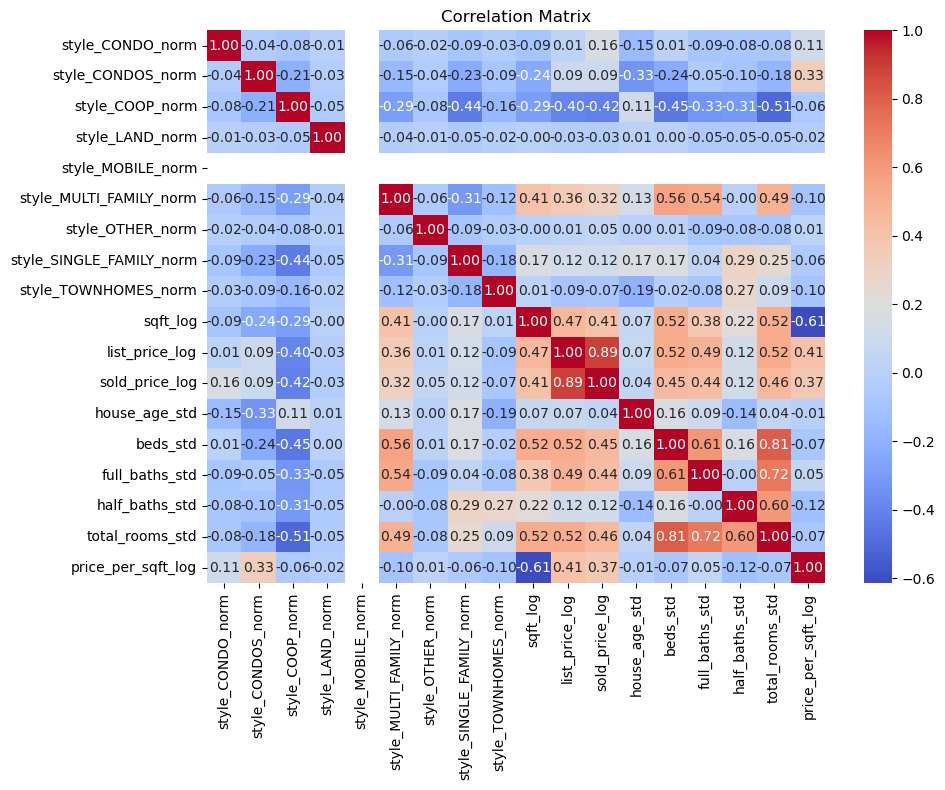

In [105]:
# Plot the correlation matrix
fig2, ax2 = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax2)
ax2.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [106]:
housing_data.to_csv('../data/housing_data.csv', index=False)

/var/folders/84/407g7szd0h91zh0w0ftr4brh0000gn/T/ipykernel_86556/2884052108.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


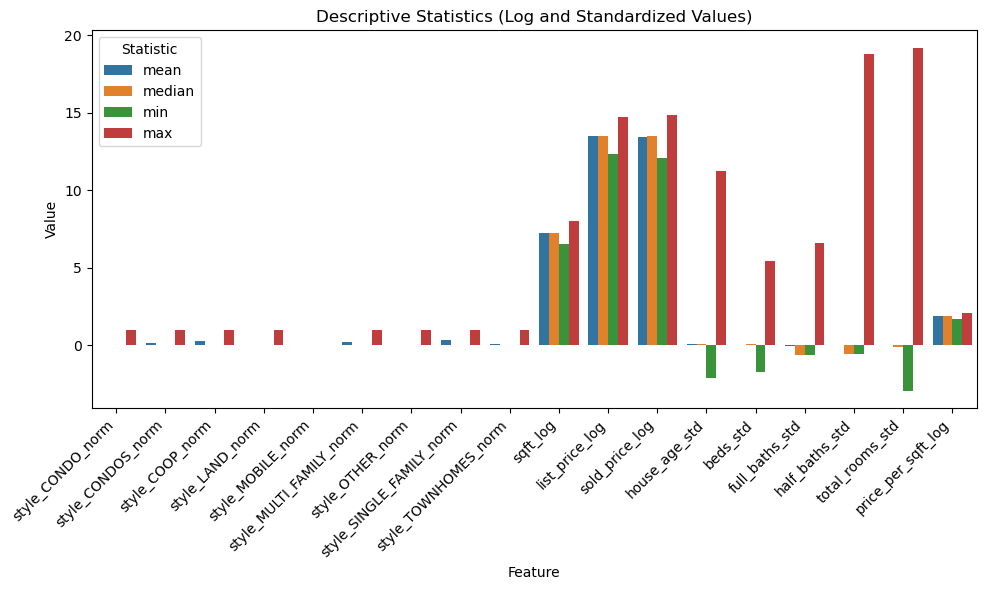

In [107]:
# Plot the descriptive statistics
descriptive_stats_df = pd.DataFrame.from_dict(descriptive_stats, orient='index')

desc_stats_long_df = descriptive_stats_df.reset_index().melt(id_vars='index', value_vars=['mean', 'median', 'min', 'max'])

desc_stats_long_df.columns = ['Feature', 'Statistic', 'Value']

fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Feature', y='Value', hue='Statistic', data=desc_stats_long_df, ax=ax1)
ax1.set_title('Descriptive Statistics (Log and Standardized Values)')
ax1.set_ylabel('Value')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 6000x4000 with 0 Axes>

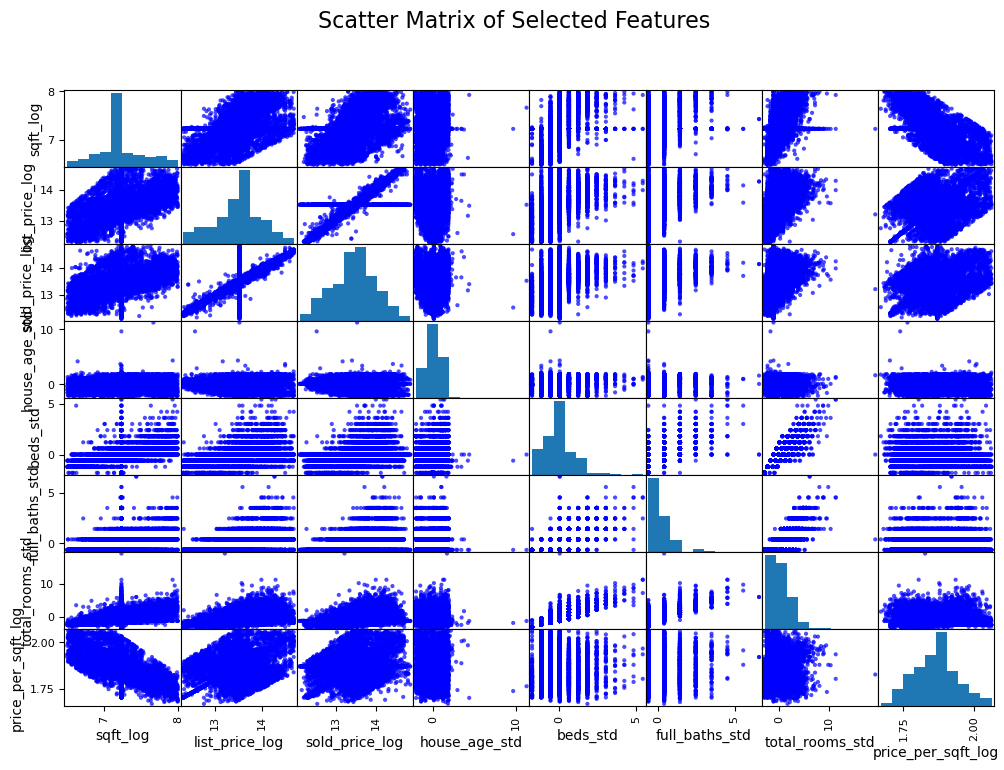

In [108]:
# Scatterplot
visualization_features = ['sqft_log', 'list_price_log', 'sold_price_log', 'house_age_std', 'beds_std', 'full_baths_std','total_rooms_std','price_per_sqft_log']

plt.figure(figsize=(60, 40))
scatter_matrix(housing_data[visualization_features], figsize=(12, 8), alpha=0.7, diagonal='hist', color='blue')
plt.suptitle('Scatter Matrix of Selected Features', size=16)
plt.show()


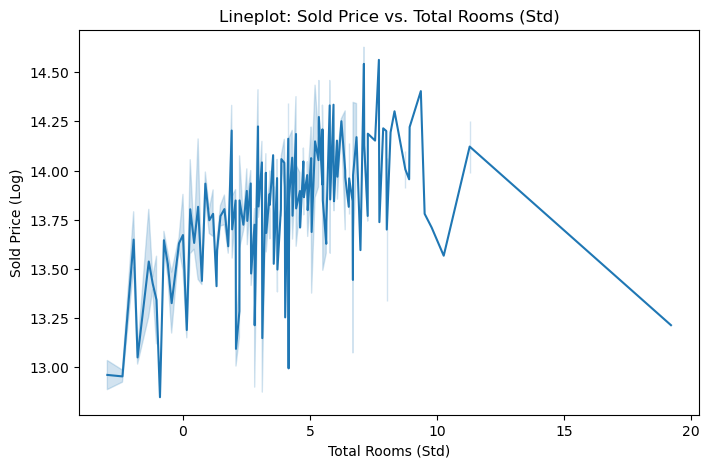

In [109]:
# Lineplot
plt.figure(figsize=(8, 5))
sns.lineplot(x='total_rooms_std', y='sold_price_log', data=housing_data)
plt.title('Lineplot: Sold Price vs. Total Rooms (Std)')
plt.xlabel('Total Rooms (Std)')
plt.ylabel('Sold Price (Log)')
plt.show()

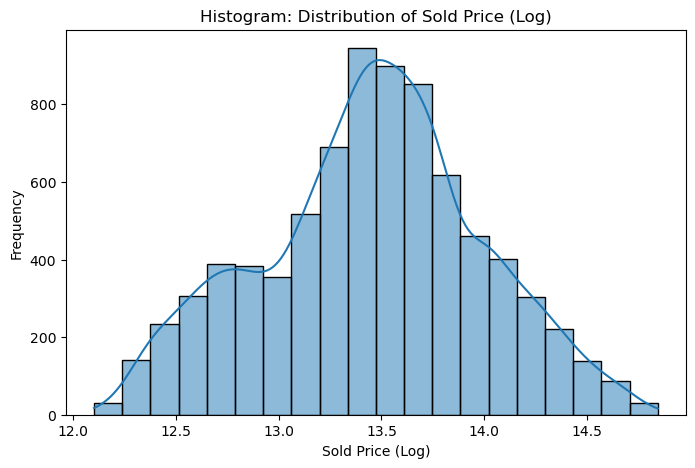

In [110]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(housing_data['sold_price_log'], kde=True, bins=20)
plt.title('Histogram: Distribution of Sold Price (Log)')
plt.xlabel('Sold Price (Log)')
plt.ylabel('Frequency')
plt.show()

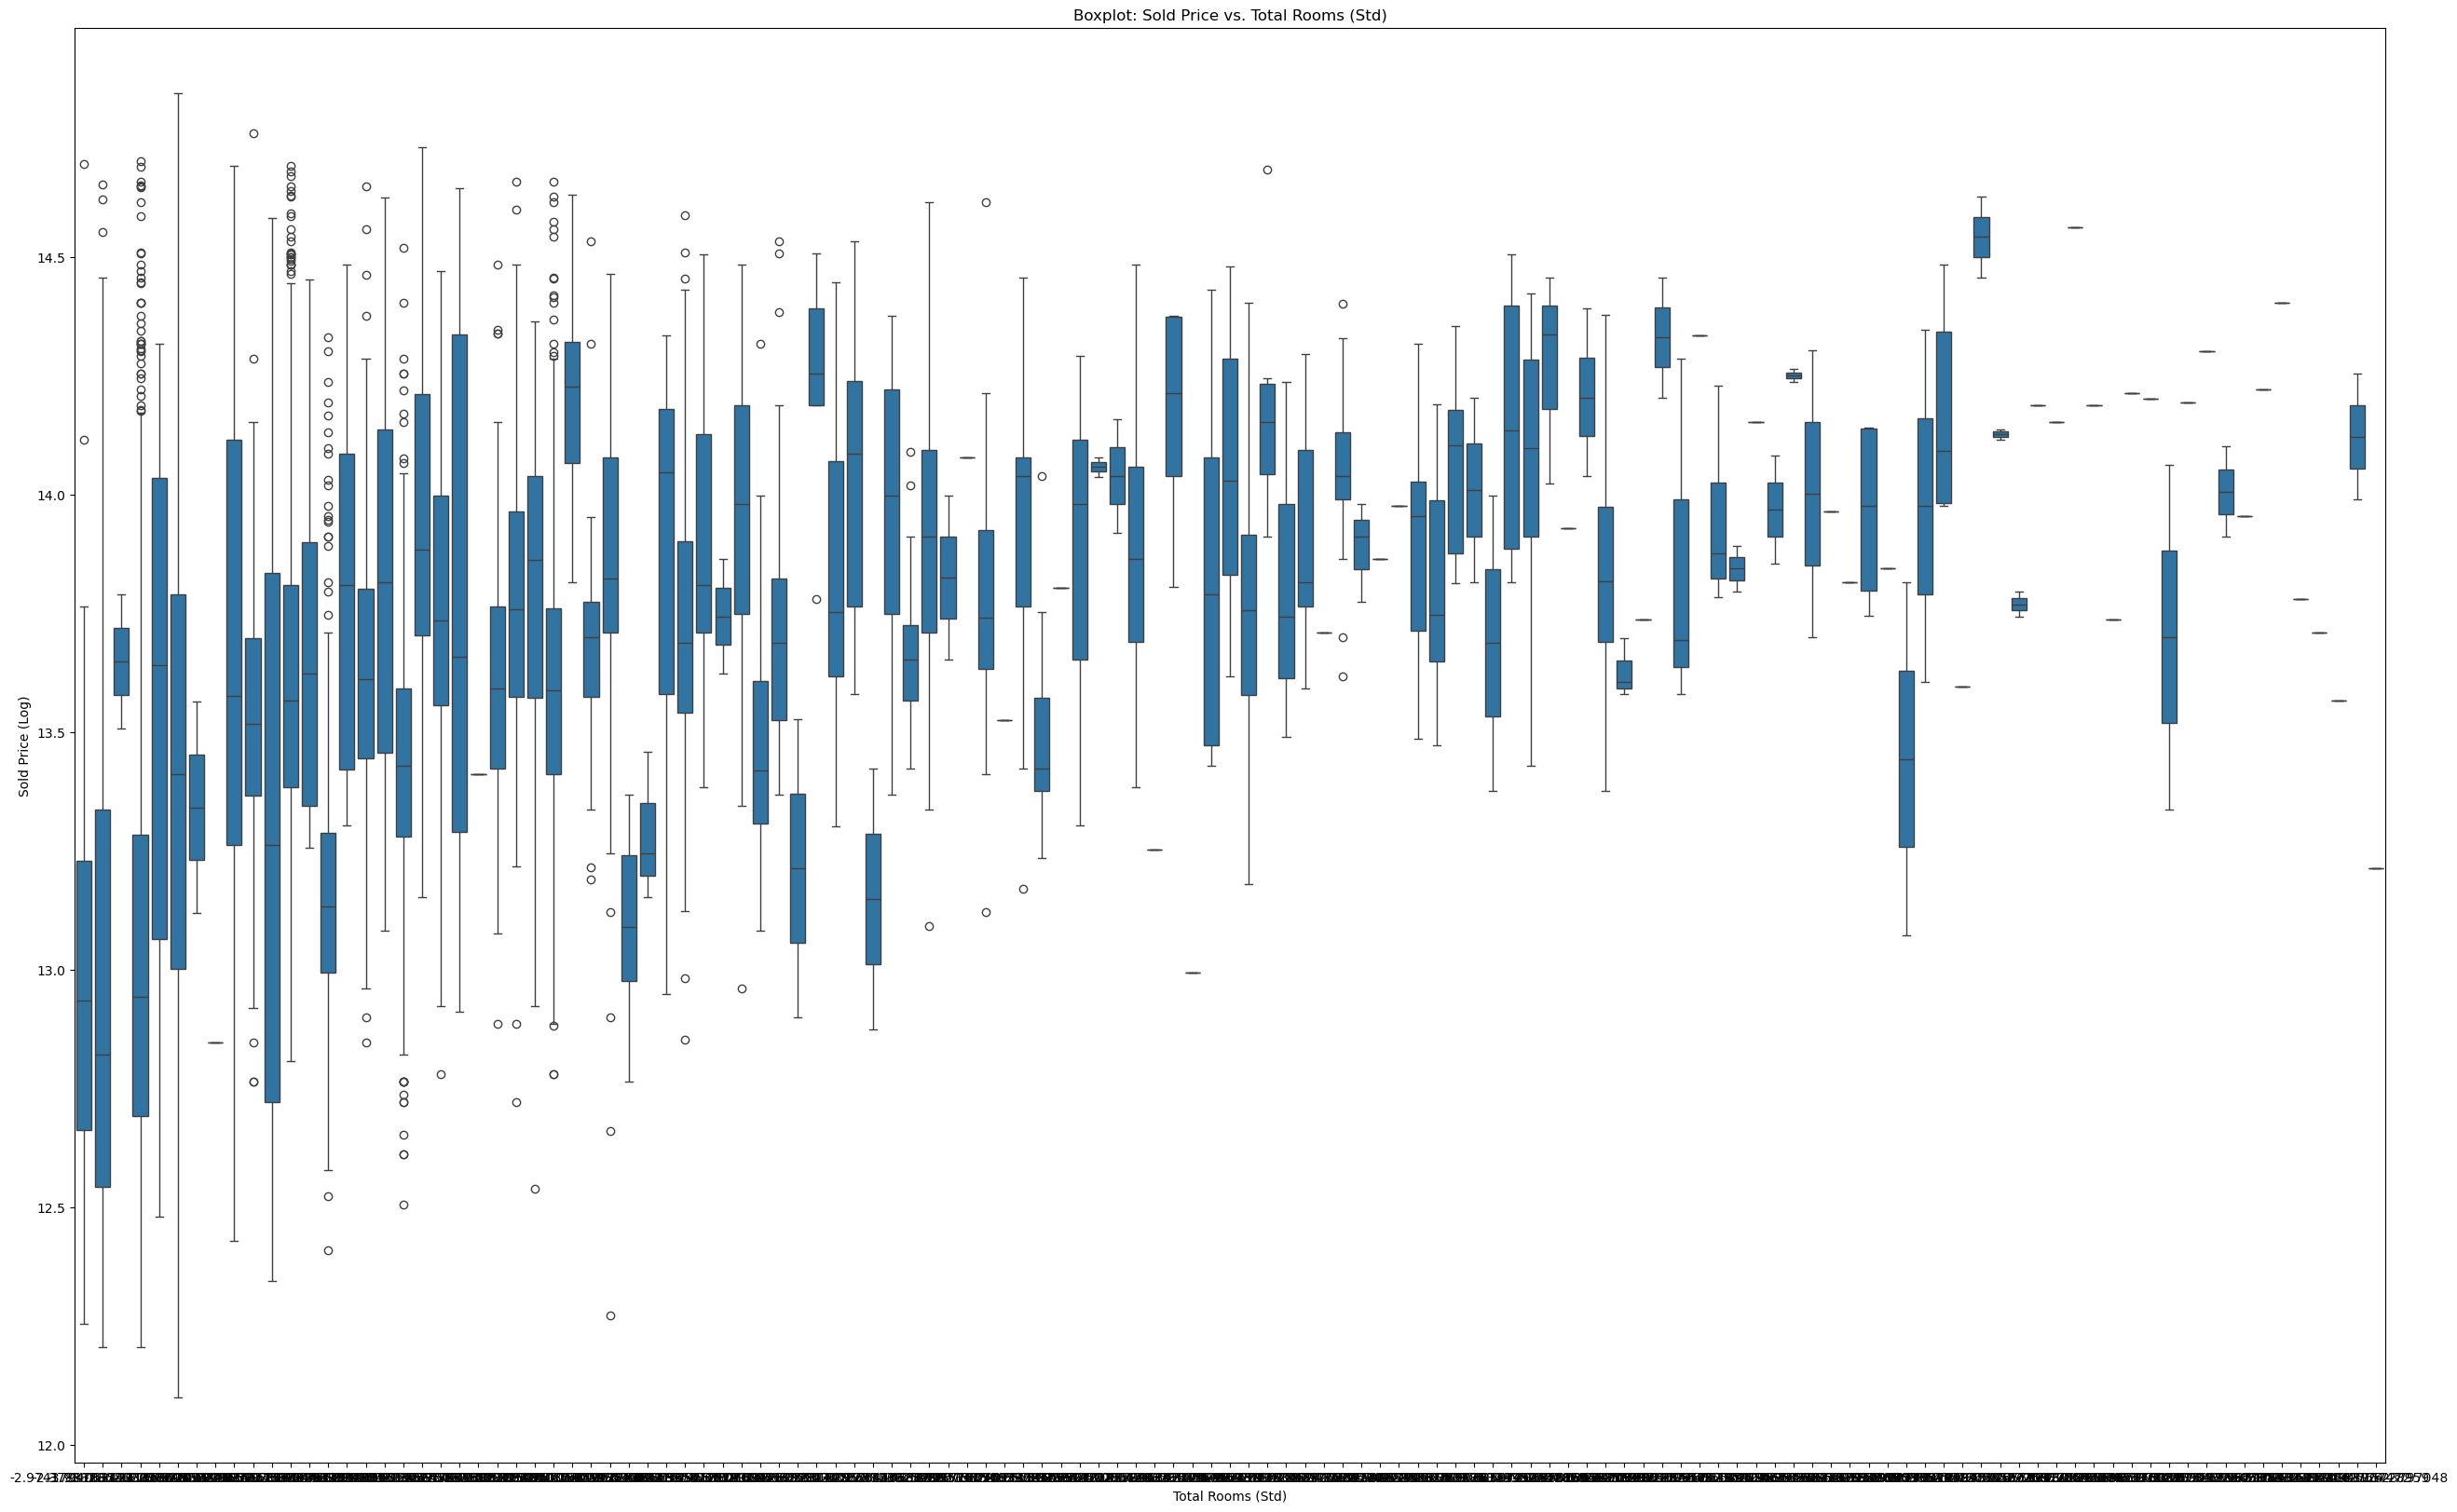

In [111]:
# Boxplot
plt.figure(figsize=(32, 20))
sns.boxplot(x='total_rooms_std', y='sold_price_log', data=housing_data)
plt.title('Boxplot: Sold Price vs. Total Rooms (Std)')
plt.xlabel('Total Rooms (Std)')
plt.ylabel('Sold Price (Log)')
plt.show()